<img style="float:left" width="40%" src="pics/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="12%" src="pics/PythonLogo.svg">
<br style="clear:both;">

# Sistemas Inteligentes aplicados en Salud

<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">Práctica 2: Reconocimiento de formas con redes neuronales</h2>
<br style="clear:both;">
<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: orange; line-height: 1.3em; color: white; border-radius: 10px;">Enunciado y tareas</h2>

### Grado en Ingeniería de la Salud 

  **Curso 24-25**


# Reconocimiento de formas

En esta práctica se va a trabajar con el *reconocimiento de formas* (*pattern recognition*, en inglés).

Las imágenes con las que se va a trabajar pertenecen a la familia de imágenes **MNIST**, cuya versión original se puede obtener en http://yann.lecun.com/exdb/mnist/(URL verificada en octubre del 2024). 

MNIST significa *Modified NIST*, donde, a su vez, NIST quiere decir *National Institute of Standards and Technology*. La palabra clave es **modified**. MNIST se constituye de una serie de imágenes de dígitos escritos a mano alzada, entre 0 y 9. Cada dígito está representado por una imagen en blanco y negro. 

<img style="float:center" width="60%" src="pics/MNIST_num.png">

El conjunto de datos **EMNIST** es un conjunto de dígitos y caracteres manuscritos derivados de la base de datos **NIST Special Database 19** y convertidos a un formato de imagen de 28x28 píxeles y a una estructura de conjunto de datos que coincide directamente con el conjunto de datos MNIST.

<img style="float:center" width="60%" src="pics/EMNIST.png">


La base de datos **NIST Special Database 19** contiene todo el corpus de materiales de formación del NIST para el reconocimiento de documentos y caracteres impresos a mano. Dispone de información recopilada de impresos a mano de unos 3.600 escritores, lo que proporciona unas 810.000 imágenes con clasificaciones comprobadas a mano.

Referencia: *Cohen, G., Afshar, S., Tapson, J., & van Schaik, A. (2017). EMNIST: an extension of MNIST to handwritten letters. Retrieved from http://arxiv.org/abs/1702.05373*

Se trata de imagenes sencillas, con poca variabilidad entre ellas, por lo que es un problema que podemos abordar empleando un perceptrón simple.

Cada imagen en MNIST está perfectamente centrada y el dataset se halla idóneamente balanceado. En el mundo real los datos no se comportan tan bien. Así mismo, los ejemplos que representan cada clase presentan, por definición, poca variabilidad (después de todo, no hay demasiadas formas de escribir un 1). 

<div class="alert alert-info"> <b>IMPORTANTE</b><br> Se utilizará el perceptron implementado en <b>Introducción a Redes Neuronales</b> y será necesario tener presente lo tratado en <b>Fundamentos de Procesamiento de Imagen</b>.</div>

Todos los datos de **EMNIST** se encuentran en formato `IDX`.

todas las imagenes con las que vamos a trabajar tienen el mismo tamaño.

a partir de conjunto completo vamos a crear un gupo de imagenes de entrenamiento y un grupo de imagenes de test.

vamos a tener un archivo con el conjunto de etiquetas(las etiquetas tienen la info suficientepara que nos digan lo que está representado en la gráfica)

### El formato IDX
El formato de archivo IDX es un formato sencillo para vectores y matrices multidimensionales de diversos tipos numéricos. El formato básico es

        magic number
        size in dimension 0
        size in dimension 1
        size in dimension 2
        .....
        size in dimension N
        data 

En los datos de los que disponemos, tendremos un archivo de imágenes y un archivo de etiquetas. Ambos archivos se encuentran "sincronizados" de forma que la primera etiqueta del archivo de etiquetas se corresponde con la primera imagen del archivo de imágenes y así con todas. Cada uno de los archivos vendrá dado por el siguiente esquema:

**ARCHIVO DE CONJUNTO DE ETIQUETAS (labels-idx1-ubyte):**

    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000801(2049) magic number (MSB first)
    0004     32 bit integer  60000            number of items
    0008     unsigned byte   ??               label
    0009     unsigned byte   ??               label
    ........
    xxxx     unsigned byte   ??               label
Los valores de las etiquetas toman valores de 0 a 46.

**ARCHIVO DE CONJUNTO DE IMAGENES (images-idx3-ubyte):**

    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000803(2051) magic number
    0004     32 bit integer  60000            number of images
    0008     32 bit integer  28               number of rows
    0012     32 bit integer  28               number of columns
    0016     unsigned byte   ??               pixel
    0017     unsigned byte   ??               pixel
    ........
    xxxx     unsigned byte   ??               pixel

## Objetivos:

En esta práctica se emplearán las imágenes de *num-MNIST* y se cubrirán los siguientes puntos:

1. Obtener un conjunto de datos $(X,y)$, donde:
    - $X$ será un conjunto de *atributos* que describa una imagen. En este caso tomaremos los valores de los píxeles de una imagen.
    - $y$ será la *clase*  
    
<br style="clear:both;">

2. Dividir el conjunto de datos (imágenes, en nuestro caso) en dos partes: 
    - (1) un conjunto de *entrenamiento* 
    - (2) un conjunto de *test*.  

<br style="clear:both;">

3. Entrenar una *red neuronal* con la parte de los datos que forma el conjunto de *entrenamiento* y comprobar su funcionamiento con otra parte (conjunto de test), para la obtención de la tasa de acierto en el perceptrón simple.  
    - Empleando el perceptrón propio.
    - Empleando la red neuronal de **Sklearn**  

<br style="clear:both;">

4. Manejar diferentes métricas y herramientas para testear un clasificador.
    - Matriz de confusión
    - Métricas:
        - Exactitud
        - Precisión
        - Sensibilidad
        
<br style="clear:both;">

5. Implementar una red neuronal multicapa que permita clasificar todos los grupos de imágenes.

<br style="clear:both;">

6. Introducir la validación cruzada como estrategia de valoración de un clasificador.

<br style="clear:both;">

7. Añadir un nuevo conjunto de datos de test y obtener los resultados de rendimiento de las diferentes redes neuronales implementadas.

----------------------------------------

# 1. Datos

## 1.1. Manejo de los archivos IDX

- Descarga los archivos que se encuentran en la siguiente carpeta compartida MNIST: [Enlace Carpeta MNIST](https://universidaddeburgos-my.sharepoint.com/:f:/g/personal/dgarcia1_ubu_es/En7vGMQoS_tBo8fXA5F5dFoBC58TI9sJnWPBKqiUp3AUwQ?e=SmMkb3) 

- Descomprime correctamente cada uno de los archivos ```emnist-balanced-images-idx3-ubyte.gz``` y ```emnist-balanced-labels-idx1-ubyte.gz``` para obtener los datos de las imágenes y su correspondiente etiqueta.

- Comprueba que puedes acceder a las imágenes empleando Python. 
    - El número de imágenes debe coincidir con el número de etiquetas
    - Cada imagen tendrá asignada una etiqueta indexada en el mismo orden en el archivo ```labels```. Cada imagen tiene asignada una etiqueta que se corresponde con un indice (de 0 a 46), que se corresponderá a su vez con un caracter en formato ASCII (representado en la siguiente tabla entre comillas):
<table style="font-size:large">
    <tr><td>0</td><td>"0"</td><td><img style="float:left" width="100%" src="pics/caracter_0.png"></td><td>1</td><td>"1"</td><td><img style="float:left" width="100%" src="pics/caracter_1.png"></td>
    <td>2</td><td>"2"</td><td><img style="float:left" width="100%" src="pics/caracter_2.png"></td><td>3</td><td>"3"</td><td><img style="float:left" width="100%" src="pics/caracter_3.png"></td>
    <td>4</td><td>"4"</td><td><img style="float:left" width="100%" src="pics/caracter_4.png"></td><tr><td>5</td><td>"5"</td><td><img style="float:left" width="100%" src="pics/caracter_5.png"></td>
    <td>6</td><td>"6"</td><td><img style="float:left" width="100%" src="pics/caracter_6.png"></td><td>7</td><td>"7"</td><td><img style="float:left" width="100%" src="pics/caracter_7.png"></td>
    <td>8</td><td>"8"</td><td><img style="float:left" width="100%" src="pics/caracter_8.png"></td><td>9</td><td>"9"</td><td><img style="float:left" width="100%" src="pics/caracter_9.png"></td></tr>
    <tr><td>10</td><td>"A"</td><td><img style="float:left" width="100%" src="pics/caracter_10.png"></td><td>11</td><td>"B"</td><td><img style="float:left" width="100%" src="pics/caracter_11.png"></td>
    <td>12</td><td>"C"</td><td><img style="float:left" width="100%" src="pics/caracter_12.png"></td><td>3</td><td>"D"</td><td><img style="float:left" width="100%" src="pics/caracter_13.png"></td>
    <td>14</td><td>"E"</td><td><img style="float:left" width="100%" src="pics/caracter_14.png"></td><tr><td>15</td><td>"F"</td><td><img style="float:left" width="100%" src="pics/caracter_15.png"></td>
    <td>16</td><td>"G"</td><td><img style="float:left" width="100%" src="pics/caracter_16.png"></td><td>17</td><td>"H"</td><td><img style="float:left" width="100%" src="pics/caracter_17.png"></td>
    <td>18</td><td>"I"</td><td><img style="float:left" width="100%" src="pics/caracter_18.png"></td><td>19</td><td>"J"</td><td><img style="float:left" width="100%" src="pics/caracter_19.png"></td></tr>
    <tr><td>20</td><td>"K"</td><td><img style="float:left" width="100%" src="pics/caracter_20.png"></td><td>21</td><td>"L"</td><td><img style="float:left" width="100%" src="pics/caracter_21.png"></td>
    <td>22</td><td>"M"</td><td><img style="float:left" width="100%" src="pics/caracter_22.png"></td><td>23</td><td>"N"</td><td><img style="float:left" width="100%" src="pics/caracter_23.png"></td>
    <td>24</td><td>"O"</td><td><img style="float:left" width="100%" src="pics/caracter_24.png"></td><tr><td>25</td><td>"P"</td><td><img style="float:left" width="100%" src="pics/caracter_25.png"></td>
    <td>26</td><td>"Q"</td><td><img style="float:left" width="100%" src="pics/caracter_26.png"></td><td>27</td><td>"R"</td><td><img style="float:left" width="100%" src="pics/caracter_27.png"></td>
    <td>28</td><td>"S"</td><td><img style="float:left" width="100%" src="pics/caracter_28.png"></td><td>29</td><td>"T"</td><td><img style="float:left" width="100%" src="pics/caracter_29.png"></td></tr>
    <tr><td>30</td><td>"U"</td><td><img style="float:left" width="100%" src="pics/caracter_30.png"></td><td>31</td><td>"V"</td><td><img style="float:left" width="100%" src="pics/caracter_31.png"></td>
    <td>32</td><td>"W"</td><td><img style="float:left" width="100%" src="pics/caracter_32.png"></td><td>33</td><td>"X"</td><td><img style="float:left" width="100%" src="pics/caracter_33.png"></td>
    <td>34</td><td>"Y"</td><td><img style="float:left" width="100%" src="pics/caracter_34.png"></td><tr><td>35</td><td>"Z"</td><td><img style="float:left" width="100%" src="pics/caracter_35.png"></td>
    <td>36</td><td>"a"</td><td><img style="float:left" width="100%" src="pics/caracter_36.png"></td><td>37</td><td>"b"</td><td><img style="float:left" width="100%" src="pics/caracter_37.png"></td>
    <td>38</td><td>"d"</td><td><img style="float:left" width="100%" src="pics/caracter_38.png"></td><td>39</td><td>"e"</td><td><img style="float:left" width="100%" src="pics/caracter_39.png"></td></tr>
    <tr><td>40</td><td>"f"</td><td><img style="float:left" width="100%" src="pics/caracter_40.png"></td><td>41</td><td>"g"</td><td><img style="float:left" width="100%" src="pics/caracter_41.png"></td>
    <td>42</td><td>"h"</td><td><img style="float:left" width="100%" src="pics/caracter_42.png"></td><td>43</td><td>"n"</td><td><img style="float:left" width="100%" src="pics/caracter_43.png"></td>
    <td>44</td><td>"q"</td><td><img style="float:left" width="100%" src="pics/caracter_44.png"></td><tr><td>45</td><td>"r"</td><td><img style="float:left" width="100%" src="pics/caracter_45.png"></td>
    <td>46</td><td>"t"</td><td><img style="float:left" width="100%" src="pics/caracter_46.png"></td></tr>
</table>



La función `carga_data_MNIST` que permite cargar los datos de ambos archivos IDX:

Funciones empleadas:
- ```join```del módulo ```path```de ```os```.
- ```open```del módulo ```gzip```.

Obtenemos una lista de imágenes (que proviene del archivo de imágenes) y una lista de indices (proveniente del archivo de 'labels'):

In [2]:
def carga_data_MNIST(input_path,file_images, file_labels ):
    """ Permite cargar los datos almacenados en formato IDX
    Parámetros
    ----------
        input_path: Carpeta en la que se encuentran los archivos
        file_images: nombre del archivo de imágenes
        file_labels: nombre del archivo de etiquetas
    
    Devolución
    --------
        images -- array 3D con los datos de cada imagen
        labels -- array 1D con el numero de clase de cada de las imágenes
    """     
    import gzip

    import numpy as np
    import matplotlib.pyplot as plt

    from os.path  import join

    images_path = join(input_path, file_images)
    labels_path = join(input_path, file_labels)

    ## Comenzamos con el archivo que contiene las imágenes:
    print("***********************************")
    #Instanciamos el manejador de archivo mediante la función open 
    images_byte = gzip.open(images_path,'r')

    #NÚMERO MAGICO
    head=images_byte.read(4)
    magic = int.from_bytes(head, byteorder='big')
    print("Numero mágico para el archivo de imágenes:")
    print(magic)

    #NUMERO DE IMAGENES
    head=images_byte.read(4)
    number_images = int.from_bytes(head,byteorder='big')
    print("Numero de imágenes:")
    print(number_images)

    #NUMERO DE FILAS DE LA IMAGEN
    head=images_byte.read(4)
    rows = int.from_bytes(head,byteorder='big')
    print("Numero de filas (imágenes):")
    print(rows)

    #NUMERO DE COLUMNAS DE LA IMAGEN
    head=images_byte.read(4)
    columns = int.from_bytes(head,byteorder='big')
    print("Numero de columnas (imágenes):")
    print(columns)

    #CARGA DE DATOS
    buf = images_byte.read(rows * columns * number_images)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    array = data.reshape(number_images, rows, columns)
    images=array.swapaxes(1, 2)
    
    
    ## A partir de aquí procesamos el archivo que contiene las etiquetas:
    print("***********************************")
    labels_byte = gzip.open(labels_path,'r')

    #NÚMERO MAGICO
    head=labels_byte.read(4)
    magic = int.from_bytes(head,byteorder='big')
    print("Numero mágico para el archivo de etiquetas:")
    print(magic)

    #NUMERO DE ETIQUETAS
    head=labels_byte.read(4)
    number_labels = int.from_bytes(head,byteorder='big')
    print("Numero de etiquetas:")
    print(number_labels)

    #CARGA DE ETIQUETAS
    buf = labels_byte.read(number_labels)
    labels = np.frombuffer(buf, dtype=np.uint8)
    print("***********************************")
    
    return images, labels

Según los archivos proporcionados, se va a trabajar con `112800` imágenes y por tanto con `112800` etiquetas. El tamaño de cada una de las imágenes es de 28x28 píxeles.

<div class="alert alert-warning"> <b>IMPORTANTE</b><br> Antes de continuar, comprueba que los datos indicados coinciden con los obtenidos de los archivos IDX proporcionados.</div>


In [3]:
#input_path='./MNIST_balanced./'
input_path='./MNIST_balanced/'
file_images= 'emnist-balanced-images-idx3-ubyte.gz'
file_labels = 'emnist-balanced-labels-idx1-ubyte.gz'

[images,labels]=carga_data_MNIST(input_path,file_images,file_labels)
print(images.shape)
print(labels.shape)

***********************************
Numero mágico para el archivo de imágenes:
2051
Numero de imágenes:
112800
Numero de filas (imágenes):
28
Numero de columnas (imágenes):
28
***********************************
Numero mágico para el archivo de etiquetas:
2049
Numero de etiquetas:
112800
***********************************
(112800, 28, 28)
(112800,)


# `TAREA 1`

Hasta el momento tenemos los valores de etiqueta obtenidos del archivo `labels`, pero este valor no nos proporciona información directa sobre el caracter que representa ese indice. Para ello tenemos a nuestra disposición un archivo que nos permite realizar esa 'traducción'. Se trata del archivo `claves_ASCII.txt` que se encuentra en la carpeta `MNIST_balanced`. 

Para poder trabajar en adelante con el caracter representado y no con el índice, se **solicita crear una función `crea_diccionario` con la que se obtenga un diccionario en el cual la clave será el indice (del 0 al 46) y el valor será el caracter ASCII que representa ('A', 'B', '0', '1'...)**. La función tendrá como parámetro de entrada un archivo de texto que será procesado convenientemente.

De esta forma, la ejecución de la siguiente celda:

In [17]:
def crea_diccionario(archivo_claves):
    """
    Crea un diccionario para mapear índices a caracteres ASCII.

    Parámetros
    ----------
    archivo_claves : str
        Ruta del archivo de texto que contiene el mapeo de índices a caracteres en formato ASCII.

    Devolución
    ----------
    dict
        Diccionario con índices como claves y caracteres ASCII como valores.
    """
    diccionario = {}
    
    with open(archivo_claves, 'r') as f:
        for linea in f:
            # Divide cada línea en índice y valor ASCII, luego convierte a carácter
            indice, ascii_valor = linea.strip().split()
            diccionario[int(indice)] = chr(int(ascii_valor))  # Convierte ASCII a carácter
    
    return diccionario




In [18]:
archivo_claves="./MNIST_balanced/claves_ASCII.txt"
caracteres=crea_diccionario(archivo_claves)
print(caracteres)


{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'}


El resultado de la ejecución de la celda anterior, debería proporcionar una estructura de datos `caracteres` con el siguiente contenido:

```
{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'}

```



---
## 1.2. Procesado de las imágenes

En las siguientes celdas vamos a ir viendo cual es el contenido de las estructuras de datos obtenidas de la lectura de los archivos `IDX`.

Seleccionamos una de las imágenes y etiqueta que se encuentren pareadas al azar (deben coincidir en el índice):

In [21]:
img = images[87]
eti = labels[87]
print(eti)
print(eti)
#la imagne sale como una matriz con datos de intensidad (array de np)

35
35


### 1.2.1 Muestra una imagen

Empleando las funciones de **skimage** que vimos en anteriores sesiones, podemos cargar y procesar las imágenes:

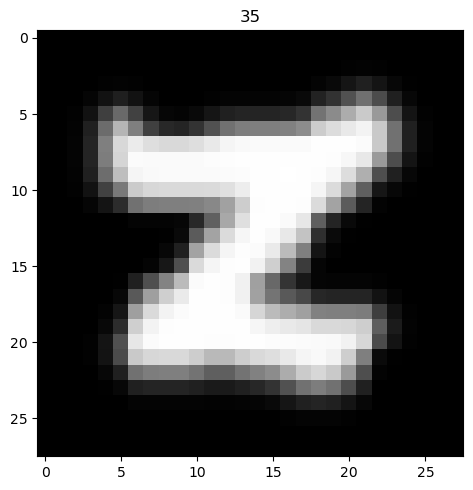

In [22]:
from skimage.io import imshow, imread
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img,cmap='gray')
ax.set_title(eti)
plt.tight_layout()
plt.show()

### 1.2.2 Muestra varias imágenes

Mediante la función `show_images` podemos mostrar varias imágenes y su correspondiente caracter:

In [26]:
def show_images(images, labels, caracteres, columnas, filas):
    """ Permite mostrar la primeras n imagenes ( n = columnas x filas)
    Parámetros
    ----------
        images -- array 3D con los datos de cada imagen
        labels -- array 1D con el numero de clase de cada de las imágenes
        caracteres -- diccionario que proprociona el caracter que se corresponde a cada una de las imágenes
        columnas: numero de columnas a mostrar
        filas: numero de filas a mostrar
    """    
    fig, ax = plt.subplots(ncols=columnas,nrows=filas,figsize=(10, 10))
    axes=ax.ravel()
    index = 0   
     
    for x in zip(images, labels):        
        image = x[0]        
        label = caracteres[x[1]]
         
        axes[index].imshow(image,cmap='gray')
        axes[index].set_title(label)
        axes[index].axis("off")
 
        plt.title(label);        
        index += 1
        if index>=(columnas*filas):
            plt.tight_layout()
            plt.show()
            return

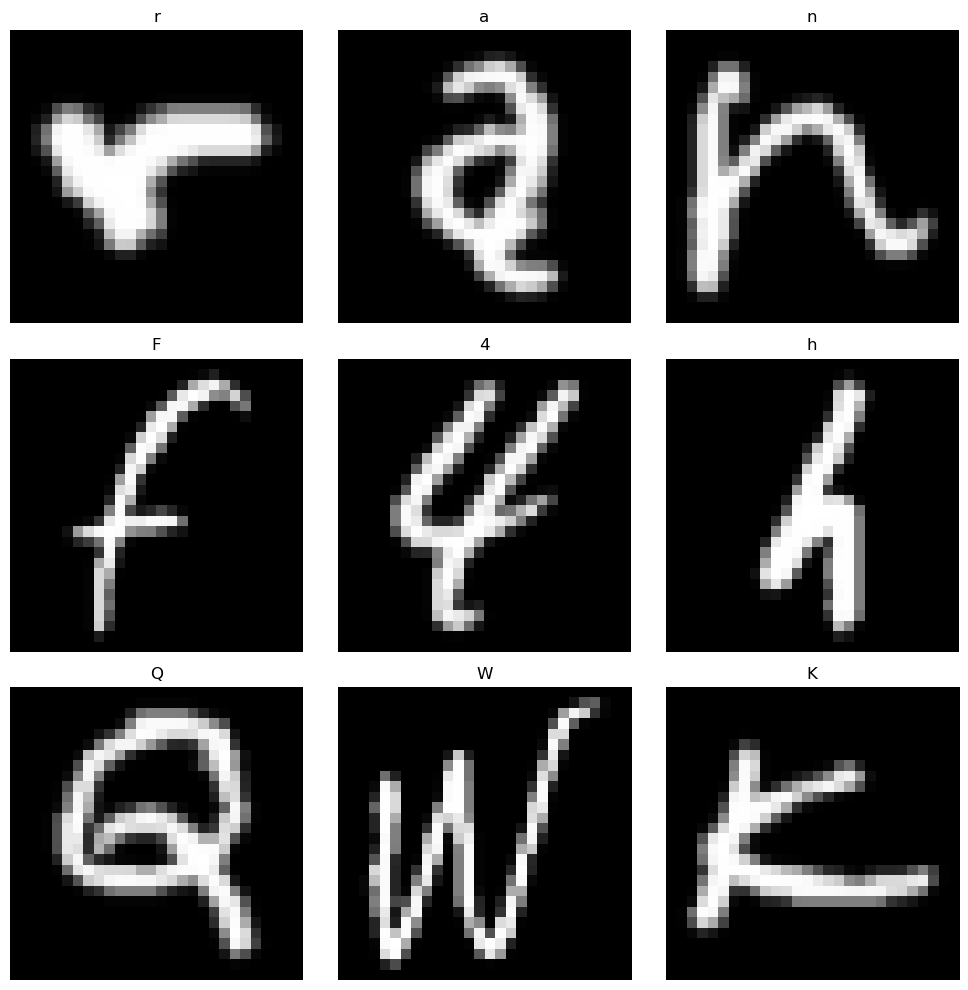

In [28]:
show_images(images,labels,caracteres,3,3)

Si está todo correcto, la ejecución de:

```python
show_images(images,labels,caracteres,3,3)
```

debería proporcionar una imagen similar a esta:


<img style="float:center" width="60%" src="pics/imagenes_labels.png">


### 1.2.3 Características de las imágenes:

Empleando propiedades específicas podemos obtener el tamaño de cada una de las imágenes:

In [17]:
'''
Obtener el tamaño de la imagen (pixeles)
'''
print(img.shape)

(28, 28)


In [12]:
print(img.size) # alto x ancho (el número total de pixels)

784


### 1.2.4 Modificando el formato de las imágenes:

Para poder trabajar con los datos de las imágenes en las redes neuronales a implementar, tendremos que pasar de datos en dos dimensiones a una única dimensión:

In [32]:
'''
[[p00,p01],
 [p10,p11]]  => [p00,p01,p10,p11]

'''
# Se pasa a una sola fila y se convierte en lista (la imagen se "vectoriza")
lista_pixels = img.reshape(img.size).tolist()

# Muestro los primeros
print(lista_pixels[:10])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Además, para optimizar y facilitar el coste computacional de los procesos, vamos a reducir el tamaño de las imágenes, pasando a tener imágenes de 16x16:

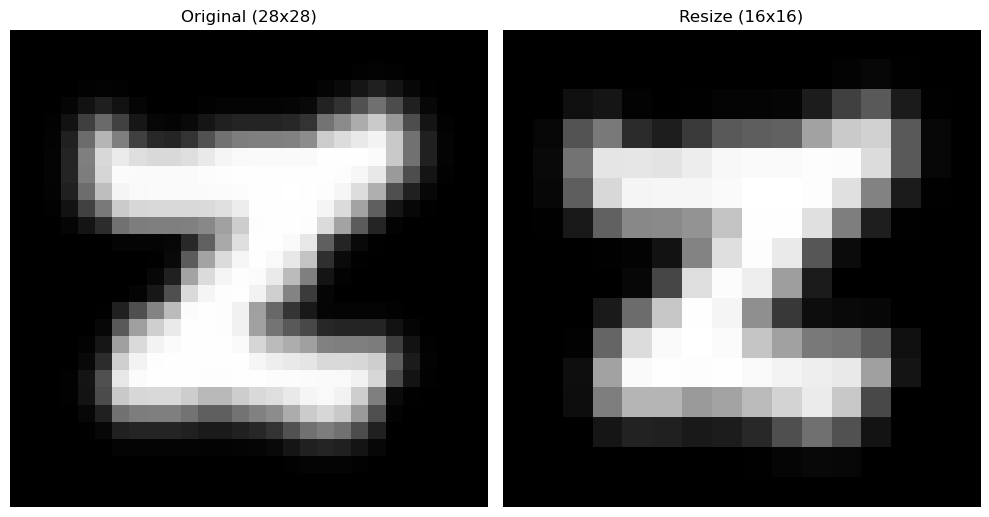

In [19]:
'''
Redimensionar una imagen a 16 x 16
'''

from skimage.transform import resize
import warnings

'''
El Método resize muestra un "warning", 
El Método filterwarnings permite ignorar el "warning" y que no se muestre en pantalla.
''' 
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(ncols=2,figsize=(10, 10))
axes=ax.ravel()

axes[0].imshow(img,cmap='gray')
axes[0].set_title("Original (28x28)")
axes[0].axis("off")


img_mini =  resize(img, (16, 16))
axes[1].imshow(img_mini,cmap='gray')
axes[1].set_title("Resize (16x16)")
axes[1].axis("off")

plt.tight_layout()
plt.show()

## 1.3. Obtención del conjunto de datos

Para entrenar una red neuronal (o cualquier otro clasificador), se necesita un conjunto de datos.

El conjunto de datos estará formado por $X$ e $y$. 

- $X$ será un array 2D con tantas filas como imágenes y tantas columnas como atributos se usen para describir cada imagen. En nuestro caso, los atributos serán simplemente los valores de los píxeles.
- $y$ será un array de una sola dimensión, con tantos elementos como imágenes. Sus valores serán los nombres de las clases de cada imagen.

***Ejemplo inventado***.
Los valores de los atributos van entre 0 y 1 con formato float. Es 0 si el color del pixel es negro, y 1, si es blanco.
<table>
<tr style="border-top: 1px solid"><th>X<sub>1</sub></th><th>X<sub>2</sub></th><th>...</th><th>X<sub>n</sub></th><th>y</th></tr>
    <tr style="border-top: 1px solid"><td>0.1</td><td>0.3</td><td>...</td><td>0.8</td><td>'a'</td></tr>
    <tr style="border-top: 1px solid"><td>0.2</td><td>0.2</td><td>...</td><td>0.3</td><td>'A'</td></tr>
    <tr style="border-top: 1px solid"><td>0.9</td><td>0.2</td><td>...</td><td>0.3</td><td>'b'</td></tr>
    <tr style="border-top: 1px solid"><td>0.9</td><td>0.5</td><td>...</td><td>0.3</td><td>'Z'</td></tr>
    <tr style="border-top: 1px solid"><td>0.8</td><td>0.7</td><td>...</td><td>0.8</td><td>'3'</td></tr>
    <tr style="border-top: 1px solid"><td>0.1</td><td>0.4</td><td>...</td><td>0.6</td><td>'8'</td></tr>
</table>

# `TAREA 2`
**Implementar una función *get_dataset()* que devuelva $X$ e $y$.** 
- HINT: para incluir todos los datos en un único vector se puede emplear *reshape*.

le pones el diccionario que traduce el indie a caracter, si la dejamos en 28*28 en num_pix hay que poner 28

In [44]:
def getdataset(images,labels, caracteres, num_pix):
    """ Obtiene los arrays de numpy con las imágenes y las etiquetas
    Parámetros
    ----------
        imagenes -- estructura de datos que contiene la información de cada una de las imágenes
        etiquetas -- estructura de datos que contiene la información de la clase a la que
        pertenece cada una de las imágenes
        caracteres -- diccionario que contiene la "traducción" a ASCII de cada una de las etiquetas
        num_pix -- valor de la resolución de la imagen (se debe obtener una imagen num_pix x num_pix)
    
    Devolución
    --------
        X -- array 2D (numero_imagenes x numero_pixeles) con los datos de cada una de las imágenes
        y -- array 1D (numero_imagenes) con el caracter que representa cada una de las imágenes
    """ 
    import warnings
    warnings.filterwarnings("ignore")
    import numpy as np
    
       
    #Completar el código necesario:
    #  Recorre todos las imágenes y etiquetas
    #  Asigna un caracter al valor de etiqueta
    #  Convierte cada imagen a un vector de tamaño (num_pix * num_pix)
    #  Los datos de salida deben ser un array de numpy.
    #  Si alguna imagen no es correcta, muestra un error y no almacenes ni la imagen ni la etiqueta
    X = []
    y = []
    for i in range(len(labels)):
        label = labels[i]
        
        # Verifica si la etiqueta está en el diccionario
        if label in caracteres:
            # Traduce la etiqueta al caracter ASCII correspondiente
            y.append(caracteres[label])

            # Convierte la imagen a un vector de tamaño (num_pix * num_pix)
            vector_tamaño_imagen = images[i].reshape(num_pix * num_pix)
            X.append(vector_tamaño_imagen)
        else:
            # Si la etiqueta no está en el diccionario, la excluye
            print(f"Etiqueta desconocida en índice {i}: {label}. La imagen y la etiqueta serán excluidas.")
    # Convertir las listas X e y en arrays de numpy
    X = np.array(X)
    y = np.array(y)
    
    
        
    return X, y

In [47]:
Ximage, yimage=getdataset(images,labels, caracteres, 28)
print(Ximage.shape,yimage.shape)

(112800, 784) (112800,)


Una vez cargados todos los archivos correctamente, ejecución de las siguientes líneas de código:
```python
Ximage, yimage=getdataset(images,labels, caracteres, 16)
print(Ximage.shape,yimage.shape)
```
deberían mostrar por pantalla:

```
(112800, 256) (112800,)
```

# 2. Construcción y evaluación de un *clasificador de formas*. 


Tal y como ya hemos visto, en **Python** tenemos una librería de minería de datos llamada **Scikit-learn** o **Sklearn**. En el entrenamiento del perceptrón, trabajamos con esta librería puesto que nos permite entrenar muchos tipos de clasificadores, entre ellos, una **red neuronal**.

Para esta práctica, por el momento, solamente tenemos un conjunto de imágenes, por lo que unicamente disponemos un conjunto de datos. 

## 2.1 Creación de los conjuntos de datos

Para comprobar el funcionamiento de nuestro clasificador, necesitamos un conjunto de datos de entrenamiento que nos permita configurar el percetrón. Es decir, tenemos que descomponer el conjunto de datos en dos subconjuntos: 
* entrenamiento

* test.

Para este trabajo, vamos a implementar una *partición* de **70/30**, para *entrenamiento/test*.

El método ```train_test_split``` del módulo ```sklearn.model_selection``` permite dividir un conjunto de datos en dos partes, una para entrenar el clasificador, y otra para evaluar su funcionamiento (test).

<div class="alert alert-info"> <b>from</b> sklearn.model_selection <b>import</b> train_test_split<br>
    <b>help </b>(train_test_split)<br></div>

**Importante:** El uso de la propiedad de *estratificación* (```stratify```) como flag en el método ```train_test_split``` permite que haya la misma proporción de clases en entrenamiento que en test.

Para ello emplearemos una llamada al método `train_test_split` de la siguiente manera:

```Python
from sklearn.model_selection import train_test_split

'''
El par X_train, y_train son los atributos y clases del conjunto de entrenamiento (70% de los ejemplos)
El par X_test, y_test son los atributos y clases del conjunto de test (30% de los ejemplos)

stratify (estratificar) significa que se quiere que haya la misma proporcion de cada una de las clases
tanto en entrenamiento como en test, es decir, no es una partición completamente aleatoria.
'''
X_train, X_test, y_train, y_test = train_test_split(Ximage, yimage, stratify=yimage, train_size = 0.7 )


```

En nuestro ejemplo, tenemos 47 clases diferentes, cada una de ellas con 2400 imágenes, por lo tanto:
- 112800 imágenes en total
    - **78960** serán de entrenamiento **(70%)**
    - **33840** serán de test **(30%)**
        
- Dado que están balanceadas por clases, para cada caracter ("0", "1",..."A", "B",...) tendremos:
    - 2400 imagenes por clase
        - 1680 imágenes de entrenamiento
        - 720 imágenes de test

La ejecución del siguiente código:

```python
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_train[0:20])
print(y_train[0:20])
```

nos debe proporcionar una salida similar a esta:
 ```
 (78960,)
(33840,)
(78960, 256)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.80951887e-04
  7.97951483e-09 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.16548263e-12
  0.00000000e+00 0.00000000e+00]]
['S' 'Z' 'G' 'S' 'G' '8' 'W' 'X' 'a' 'H' 'F' 'b' 'b' 'B' 'W' 'K' 'V' 'W'
 'E' 'C']
 ```

# 3. Clasificación con perceptrón simple

El perceptron simple que tenemos implementado de la sesión anterior, unicamente es capaz de clasificar dos clases a la vez.

Además, tal cual hemos realizado nuestra implementación, las clases serán binarias, no nombres.

Veamos un ejemplo:

In [16]:
'''
Uso de la máscara booleana 
- Seleccionar solo los datos que cumplan un criterio
- convertir un array de algún tipo en un array de 0s y 1s, con 1s donde se cumple el criterio

'''
import numpy as np 

a = np.array([1,2,3,4,5,6])
mascara = a < 4

print(mascara)
print(a[mascara])

# astype cambia al tipo que se quiera
print(mascara.astype(int)) # los True se convierten en 1s los False en 0s


[ True  True  True False False False]
[1 2 3]
[1 1 1 0 0 0]


En el caso de las imágenes con las que estamos trabajando, el planteamiento es similar, solo que tendremos que seleccionar un par de clases. Por ejemplo:

```Python 
'''
Seleccionamos sólo los casos en los que la clase sea "A" o "3" (por ejemplo)

X_2C de todos los ejemplos de X solo se seleccionan aquellos donde la clase es "A" o "3"
y_2C de todos los ejemplos de y solo se seleccionan aquellos donde la clase es "A" o "3"
'''
X_2C = Ximage[((yimage == 'A') | (yimage == '3'))]
y_2C = yimage[((yimage == 'A') | (yimage == '3'))

# Tenemos solo dos clases, pero las etiquetas siguen siendo cadenas de texto
print(X_2C.shape)
print(X_2C)
print(y_2C.shape)
print(y_2C)

```

debemos obtener:

```
(4800, 256)
[[5.57877143e-14 6.62299868e-08 1.92427193e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
(4800,)
['3' '3' '3' ... 'A' 'A' 'A']

```

Tenemos que convertir el array de caracteres a un array de '0s' y '1s'. 

<div class="alert alert-info"> <b>Recuerda:</b><br> "True" se evalúa como "1".</div>

```Python
y_2C_num = (y_2C == 'A').astype(int)
y_2C_num

```


Con esto ya podemos crear los conjuntos de datos de entrenamiento y test compatibles con nuestro perceptrón:

```Python
from sklearn.model_selection import train_test_split
X2C_train, X2C_test, y2C_train, y2C_test = train_test_split(X_2C, y_2C_num, stratify=y_2C_num, train_size = 0.7 )

```

# `TAREA 3`

Incluye las funciones `entrena_perceptron`, `predice` y `evalua` en el archivo donde vayas a organizar las funciones implementadas y comprueba su funcionamiento con los datos de entrenamiento y test 

```python
from modules import entrena_perceptron,evalua #Tendras que ajustar esta importación de acuerdo a tu archivo de funciones.
z = 0.0     # umbral
eta = 0.1   # learning rate
t = 50      # número de iteraciones

weights, errors = entrena_perceptron(X2C_train, y2C_train, z, eta, t,funcion_escalon)
y_pred_2C_own=predice(weights,X2C_test,z,funcion_escalon)
porcentaje_acierto_perceptron_own=evalua(y2C_test, y_pred_2C_own)
print(porcentaje_acierto_perceptron_own)

```

Debemos obtener un valor alrededor de 0.99

De la misma forma podemos emplear las funciones que nos permiten crear un perceptrón en `sklearn`:

```Python
from sklearn.linear_model import Perceptron
from modules import evalua #Tendras que ajustar esta importación de acuerdo a tu archivo de funciones.

clf = Perceptron(random_state=None, eta0= 0.1, shuffle=True, fit_intercept=True)
clf.fit(X2C_train, y2C_train)
y_pred_2C_sk = clf.predict(X2C_test)

porcentaje_acierto_perceptron_sk=evalua(y2C_test, y_pred_2C_sk)
print(porcentaje_acierto_perceptron_sk)
```

Obtendremos un valor similar al obtenido por el perceptrón propio.

## Punto 4. Elementos para la valoración de la predicción.

### Matriz de confusión

En este punto vamos a introducir una forma de presentar los resultados obtenidos en la clasificación de clases a partir de la matriz de confusión.

<div class="alert alert-info"> <b>from</b> sklearn <b>import</b> metrics<br>
    <b>help </b>(metrics.confusion_matrix)<br>
    <b>help </b>(metrics.ConfusionMatrixDisplay)<br></div>
    

    
Los valores de la diagonal principal se corresponden con los valores estimados de forma correcta por el modelo. El resto de datos representan los casos en los que el modelo *«se ha equivocado»*.

<img style="float:center" width="60%" src="pics/matrix_confusion_n2.jpg">

Supongamos que estamos intentando clasificar ```A``` y tenemos un conjunto de datos con ```A```y ```3```.

En la matriz de confusión, los valores de la diagonal principal se corresponden con los valores estimados de forma correcta por el modelo (los que clasifica como ```A``` y ```3```), tanto los verdaderos positivos *True Positive(TP)* (en este caso los que clasifica como ```A``` y que son realmente ```A```) como los verdaderos negativos *True Negative(TN)* (los que clasifica como ```3``` y por tanto no son ```A```).

<img style="float:center" width="60%" src="pics/matrizconfusionMetricas.png">

La otra diagonal, representa los casos en los que el modelo «se ha equivocado»:
- Falsos negativos (FN). Si estamos evaluando la clase ```A```, casos que siendo ```A``` lo considera ```3```.
- Falsos positivos (FP). Si estamos evaluando la clase ```A```, casos que siendo ```3``` lo considera ```A```. 


**IMPORTANTE**: Para cada una de las clases tendremos unos valores u otros dependiendo de cual estemos evaluando, simplemente cambiando el orden de la matriz de confusión.


In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np 

labels=np.unique(y2C_test)

conf_mat = metrics.confusion_matrix(y2C_test, y_pred_2C_own,labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ["3" , "A"])
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.title("Matriz de confusión Perceptron propio (A-3)")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np 

labels=np.unique(y2C_test)

conf_mat = metrics.confusion_matrix(y2C_test, y_pred_2C_sk,labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ["3" , "A"])
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.title("Matriz de confusión Perceptron simple de Sklearn (A-3)")
plt.show()


### Métricas: 

A partir de la matriz de confusión se pueden derivar varias métricas. Estas son las tres más importantes:

- **Exactitud (accuracy)**: Porcentaje de predicciones correctas. Se corresponde con el valor obtenido de nuestra función `evalua`.
- **Precisión (precision)**: Porcentaje de predicciones positivas correctas.
- **Sensibilidad (recall)** representa la tasa de verdaderos positivos. Es la proporción entre los casos positivos bien clasificados por el modelo, respecto al total de positivos. 

<div class="alert alert-info"> <b>from</b> sklearn <b>import</b> metrics<br>
    <b>    help </b>(metrics.accuracy_score)<br>
    <b>    help </b>(metrics.precision_score)<br>
    <b>    help </b>(metrics.recall_score)<br>
</div>


In [ ]:
from sklearn import metrics

accuracy=metrics.accuracy_score(y2C_test, y_pred_2C_own)
print("Exactitud: " + str(accuracy))

precision =metrics.precision_score(y2C_test, y_pred_2C_own,average=None) 
#Incluimos el parametro average=None para que calcule la métrica de precisión en las dos clases
print("Precisión: " + str(precision))

sensibilidad =metrics.recall_score(y2C_test, y_pred_2C_own,average=None)
print("Sensibilidad: " + str(sensibilidad))

In [ ]:
from sklearn import metrics

accuracy=metrics.accuracy_score(y2C_test, y_pred_2C_sk)
print("Exactitud: " + str(accuracy))

precision =metrics.precision_score(y2C_test, y_pred_2C_sk,average=None) 
#Incluimos el parametro average=None para que calcule la métrica de precisión en las dos clases
print("Precisión: " + str(precision))

sensibilidad =metrics.recall_score(y2C_test, y_pred_2C_sk,average=None)
print("Sensibilidad: " + str(sensibilidad))


# `TAREA 4`

- ¿Que ocurre con la matriz de confusión y las métricas que se obtienen de la función `evalua` cuando ejecutamos de forma repetida el entrenamiento y predicción de cada perceptrón, por ejemplo 10 veces?

```Python
from modules import entrena_perceptron,evalua #Tendras que ajustar esta importación de acuerdo a tu archivo de funciones.
from sklearn.linear_model import Perceptron

z = 0.0     # umbral
eta = 0.1   # learning rate
t = 50      # número de iteraciones

for i in range(10):
    weights, errors = entrena_perceptron(X2C_train, y2C_train, z, eta, t,funcion_escalon)
    y_pred_2C_own=predice(weights,X2C_test,z,funcion_escalon)
    clf = Perceptron(random_state=None, eta0= 0.1, shuffle=True, fit_intercept=True)
    clf.fit(X2C_train, y2C_train)
    y_pred_2C_sk = clf.predict(X2C_test)

    print("----------Round " + str(i) + "------------------")
    accuracy=metrics.accuracy_score(y2C_test, y_pred_2C_own)
    print("Exactitud_own: " + str(accuracy))
    
    precision =metrics.precision_score(y2C_test, y_pred_2C_own,average=None) 
    #Incluimos el parametro average=None para que calcule la métrica de precisión en las dos clases
    print("Precisión_own: " + str(precision))
    
    sensibilidad =metrics.recall_score(y2C_test, y_pred_2C_own,average=None)
    print("Sensibilidad_own: " + str(sensibilidad))

    accuracy=metrics.accuracy_score(y2C_test, y_pred_2C_sk)
    print("Exactitud_sk: " + str(accuracy))

    precision =metrics.precision_score(y2C_test, y_pred_2C_sk,average=None) 
    print("Precisión_sk: " + str(precision))

    sensibilidad =metrics.recall_score(y2C_test, y_pred_2C_sk,average=None)
    print("Sensibilidad_sk: " + str(sensibilidad))
    
    
```

# `TAREA 5`

- Se solicita analizar la matriz de confusión y sus correspondientes métricas para todos los diferentes pares de imágenes empleando el perceptrón de sklearn. Por ejemplo:
    * 0 - 1
    * 0 - 2
    * 0 - 3
    * ...
    * A - 0
    * A - 1
    * ...

**Importante**: Implementa las funciones necesarias para que se automatice el proceso.


## Punto 5.  Perceptrón Multicapa (MLP)

En **Sklearn**, todos los clasificadores tienen el mismo funcionamiento. Se crea el clasificador (si no indicamos ningún argumento) con todos los parámetros por defecto. Luego:
- el método **fit** entrena el clasificador
- el método **predict** recibe uno o varios ejemplos y nos devuelve las clases que estima el clasificador.

Dado que en nuestro planteamiento tenemos *N* clases, no podemos resolver el problema con un único perceptrón. Por tanto, necesitamos un perceptrón multicapa:
<div class="alert alert-info"> <b>from</b> sklearn.neural_network <b>import</b> MLPClassifier<br>
    <b>help </b>(MLPClassifier)<br></div>
    
**Atributos de MLPClassifier:**

    n_layers_int: Número de capas.
    
    n_outputs_int: Número de salidas.
        
    out_activation_str: Nombre de la función de activación.


***Links interesantes:***
- https://interactivechaos.com/es/manual/tutorial-de-deep-learning/la-clase-mlpclassifier-de-scikit-learn
- https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
- https://es.wikipedia.org/wiki/Funci%C3%B3n_SoftMax

In [17]:
'''
Entrena un clasificador (Perceptrón multicapa) con el conjunto de entrenamiento
'''

# puede tardar unos segundos
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()

classifier.fit(X_train, y_train)

print("Numero de capas: " + str(classifier.n_layers_))
print("Numero de salidas: " + str(classifier.n_outputs_))
print("Función de activación: " + str(classifier.out_activation_))

NameError: name 'X_train' is not defined

In [18]:
y_pred = classifier.predict(X_test)
y_pred[:10] # muestra las 10 primeras


NameError: name 'X_test' is not defined

In [19]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np 

labels=np.unique(y_test)

conf_mat = metrics.confusion_matrix(y_test, y_pred,labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = labels)
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.title("Matriz de confusión Perceptron Multicapa de Sklearn")
plt.xticks(rotation='vertical')
plt.show()

NameError: name 'y_test' is not defined

# `TAREA 6`
- Ejecuta las celdas anteriores para obtener la matriz de confusión para todo el conjunto de imágenes, empleando el perceptrón múlticapa e incluye los resultados de las métricas. 
- En la carpeta MNIST se encuentra los archivos `emnist-balanced-test-images-idx3-ubyte.gz` y `emnist-balanced-test-labels-idx3-ubyte.gz`. Emplea todo lo visto para el perceptrón multicapa en la práctica para trabajar con estos datos de forma que estos sean los datos de test y **todos** los empleados anteriormente, que se encuentran en `emnist-balanced-images-idx3-ubyte.gz` y `emnist-balanced-labels-idx3-ubyte.gz`, sirvan como datos de entrenamiento.
    - ¿Que resultados de metricas se obtienen?
    - ¿Hay diferencias con los obtenidos anteriormente (matriz de confusión y métricas)?

## Punto 6. Validación cruzada

En los procesos de entrenamiento de un clasificador, es conveniente realizar una evaluación de los clasificadores y nos interese modificar de forma sistemática las dos muestras (entrenamiento y test) para evaluar de una manera mas específica el comportamiento del clasificador.

Disponemos de métricas que hemos aplicado a muestras obtenidas de la división de la muestra en dos subconjuntos mutuamente excluyentes (mediante **train_test_split**), aunque esta estrategia puede provocar desviaciones en la estimación del error.

Para solventar este problema, se emplea la **validación cruzada** (cross-validation, leave-one-out). En este método se parte de un conjunto de datos de *m* muestras y se procede a entrenar el clasificador con *m-1* muestras dejando una fuera (de ahí su denominación). Posteriormente, evaluamos las respuestas del clasificador para la muestra que se quedó fuera. Este proceso se repite *m* veces, dejando fuera una muestra diferente en cada caso.


<div class="alert alert-info"> <b>from</b> sklearn.model_selection <b>import</b> cross_val_predict<br>
    <b>help </b>(cross_val_predict)<br></div>


### Validación cruzada para perceptrón simple

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import numpy as np
X_2C = Ximage[((yimage == 'A') | (yimage == '3'))]
y_2C = yimage[((yimage == 'A') | (yimage == '3'))]
y_2C_pred = cross_val_predict(Perceptron(random_state=None, eta0= 0.1, shuffle=False, fit_intercept=False), X_2C, y_2C, cv=3)
labels=np.unique(y_2C)
conf_mat = confusion_matrix(y_2C, y_2C_pred,labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = labels)

fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
plt.title("Matriz de confusión. Validación cruzada. Perceptron simple (A-3)")
plt.show()

porcentaje_acierto=evalua(y_2C, y_2C_pred)
print("Porcentaje de acierto: " + str(porcentaje_acierto))
accuracy=metrics.accuracy_score(y_2C, y_2C_pred)
print("Exactitud: " + str(accuracy))
precision =metrics.precision_score(y_2C,y_2C_pred,average=None)
print("Precisión: " + str(precision))
sensibilidad =metrics.recall_score(y_2C, y_2C_pred,average=None)
print("Sensibilidad: " + str(sensibilidad))

### Validación cruzada para perceptrón multicapa

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import numpy as np
y_pred = cross_val_predict(MLPClassifier(), Ximage, yimage, cv=3)
labels=np.unique(yimage)
conf_mat = confusion_matrix(yimage, y_pred,labels=labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = labels)

fig, ax = plt.subplots(figsize=(30,30))
cm_display.plot(ax=ax)
plt.xticks(rotation='vertical')
plt.title("Matriz de confusión MLP - Datos EMNIST")
plt.show()

accuracy=metrics.accuracy_score(yimage, y_pred)
print("Exactitud: " + str(accuracy))

precision =metrics.precision_score(yimage, y_pred,average=None) 
print("Precisión: " + str(precision))

sensibilidad =metrics.recall_score(yimage, y_pred,average=None)
print("Sensibilidad: " + str(sensibilidad))

# `TAREA 7`

- Desde un punto de vista del usuario que emplea este clasificador de imágenes, ¿qué conclusiones puedes obtener a partir de los resultados obtenidos para la clasificación de imágenes en la validación cruzada, tanto con el perceptrón simple como multicapa?
 - ¿Cómo varían los resultados cuando realizamos el análisis con todos los datos disponibles (incluir en un unico dataset los datos originales y datos de test de la tarea 6)?
